# Import Libraries

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Reading Dataset

In [2]:
data = pd.read_csv(r'Mall_Customers.csv')
df = pd.DataFrame(data)

# EDA

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df['Age'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41])

In [8]:
df['Annual Income (k$)'].unique()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137])

In [9]:
df['CustomerID'].duplicated().sum()

np.int64(0)

In [10]:
df['CustomerID'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [11]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [12]:
df['Spending Score (1-100)'].unique()

array([39, 81,  6, 77, 40, 76, 94,  3, 72, 14, 99, 15, 13, 79, 35, 66, 29,
       98, 73,  5, 82, 32, 61, 31, 87,  4, 92, 17, 26, 75, 36, 28, 65, 55,
       47, 42, 52, 60, 54, 45, 41, 50, 46, 51, 56, 59, 48, 49, 53, 44, 57,
       58, 43, 91, 95, 11,  9, 34, 71, 88,  7, 10, 93, 12, 97, 74, 22, 90,
       20, 16, 89,  1, 78, 83, 27, 63, 86, 69, 24, 68, 85, 23,  8, 18])

# Notes for Data Cleaning

In [13]:
# no nulls
# no duplicated rows
# 4 duplicated rows are similar in terms of 'Gender', 'Annual Income (k$)', and 'Spending Score (1-100)'


# Data Cleansing
1.   Adjust Columns names
2.   Adjust Columns Type
3.   Drop redundant Columns
4.   Remove Duplicates


## Check Columns Names & Types

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [15]:
df.describe(include='number')

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [16]:
df.describe(exclude='number')

,Gender
count,200
unique,2
top,Female
freq,112


In [17]:
df.rename(columns={'Age': 'Customer_Age', 'Annual Income (k$)': 'Customer_Annual_Income'}, inplace=True)

In [18]:
df.columns

Index(['CustomerID', 'Gender', 'Customer_Age', 'Customer_Annual_Income',
       'Spending Score (1-100)'],
      dtype='object')

In [19]:
df['Customer_Annual_Income'].unique()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137])

In [20]:
df.describe()

,CustomerID,Customer_Age,Customer_Annual_Income,Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Customer_Age            200 non-null    int64 
 3   Customer_Annual_Income  200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Check Redundant Columns

In [22]:
numerical_col = df[['Customer_Age', 'Customer_Annual_Income', 'Spending Score (1-100)']]

In [23]:
Colors = ["#760E0E", '#66B3FF', '#99FF99', "#A099FF"]


<Axes: >

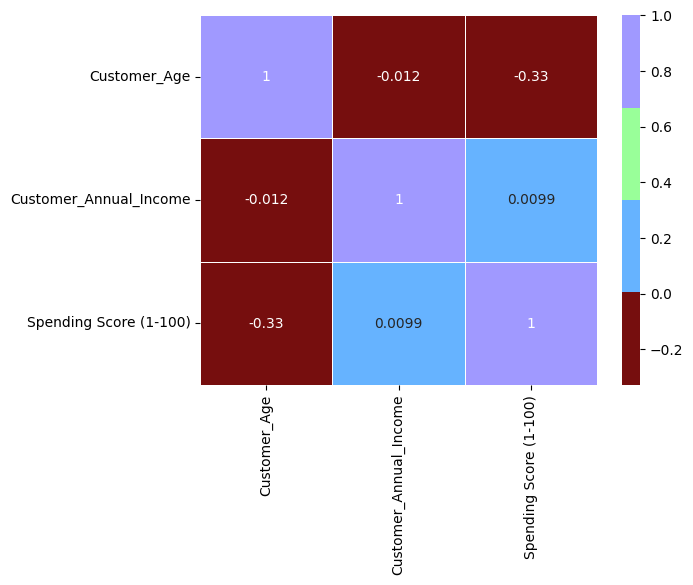

In [24]:
corr = numerical_col.corr()
sns.heatmap(corr, annot=True, cmap=Colors, linewidths=0.5)

## Check Duplicated Rows

In [25]:
df[['Gender', 'Customer_Age', 'Customer_Annual_Income','Spending Score (1-100)']].duplicated().sum()


np.int64(0)

In [26]:
df[['Gender','Customer_Annual_Income','Spending Score (1-100)']].duplicated().sum()


np.int64(4)

In [27]:
df[[ 'Customer_Age', 'Customer_Annual_Income','Spending Score (1-100)']].duplicated().sum()

np.int64(0)

## Outliers Check

In [28]:
df['Customer_Age'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41])

In [29]:
df['Customer_Age'].max()

np.int64(70)

In [30]:
IQR = df[['Customer_Age', 'Customer_Annual_Income','Spending Score (1-100)']].quantile(0.75) - df[['Customer_Age', 'Customer_Annual_Income','Spending Score (1-100)']].quantile(0.25)
print(IQR)

Customer_Age              20.25
Customer_Annual_Income    36.50
Spending Score (1-100)    38.25
dtype: float64


In [31]:
Upper_Bound = df[['Customer_Age', 'Customer_Annual_Income','Spending Score (1-100)']].quantile(0.75) + 1.5 * IQR
print(Upper_Bound)


Customer_Age               79.375
Customer_Annual_Income    132.750
Spending Score (1-100)    130.375
dtype: float64


In [32]:
Lower_Bound = df[['Customer_Age', 'Customer_Annual_Income','Spending Score (1-100)']].quantile(0.25) - 1.5 * IQR
print(Lower_Bound)


Customer_Age              -1.625
Customer_Annual_Income   -13.250
Spending Score (1-100)   -22.625
dtype: float64


In [33]:
# Age Bounds as per business logic
Lower_Bound['Customer_Age'] = 10
Upper_Bound['Customer_Age'] = 200


In [ ]:
# Annual Income
Lower_Bound['Customer_Annual_Income'] = 0.001 # to avoid division by zero errors and also no one has an annual income less than 1$
Upper_Bound['Customer_Annual_Income'] = 133

In [35]:
Lower_Bound['Spending Score (1-100)'] = 1
Upper_Bound['Spending Score (1-100)'] = 100


In [36]:
print(Lower_Bound)

Customer_Age              10.000
Customer_Annual_Income     0.001
Spending Score (1-100)     1.000
dtype: float64


In [37]:
print(Upper_Bound)

Customer_Age              200.00
Customer_Annual_Income    132.75
Spending Score (1-100)    100.00
dtype: float64


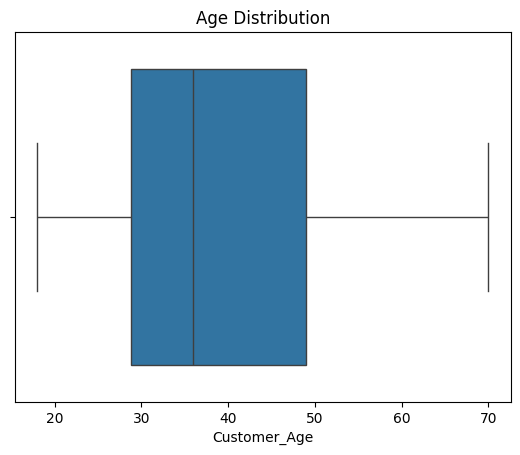

In [38]:
sns.boxplot(x=df['Customer_Age'])
plt.title('Age Distribution')
plt.show()

In [39]:
df['Customer_Age'].max()

np.int64(70)

In [40]:
df['Customer_Age'].min()

np.int64(18)

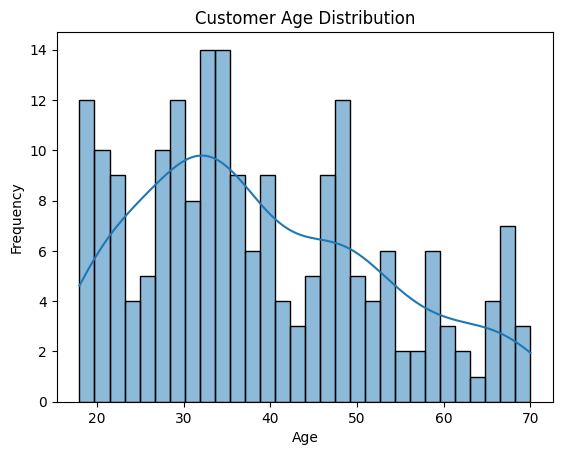

In [41]:
sns.histplot(df['Customer_Age'], bins=30, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Customer_Age            200 non-null    int64 
 3   Customer_Annual_Income  200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [43]:
df[df['Customer_Age'] > Upper_Bound['Customer_Age']]

,CustomerID,Gender,Customer_Age,Customer_Annual_Income,Spending Score (1-100)


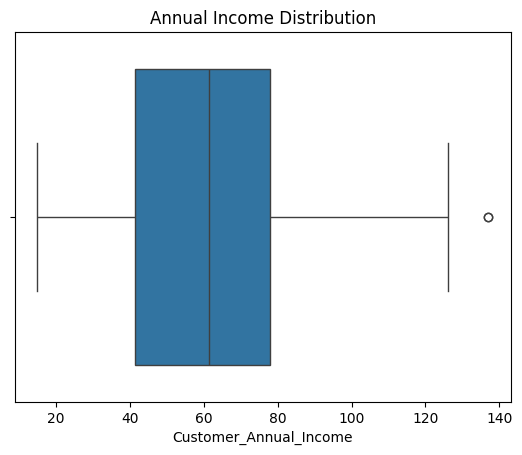

In [44]:
sns.boxplot(x=df['Customer_Annual_Income'])
plt.title('Annual Income Distribution')
plt.show()

In [45]:
df[df['Customer_Annual_Income'] > Upper_Bound['Customer_Annual_Income']]

,CustomerID,Gender,Customer_Age,Customer_Annual_Income,Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


In [55]:
df.loc[df['Customer_Annual_Income'] > Upper_Bound['Customer_Annual_Income'], 'Customer_Annual_Income'] = 133

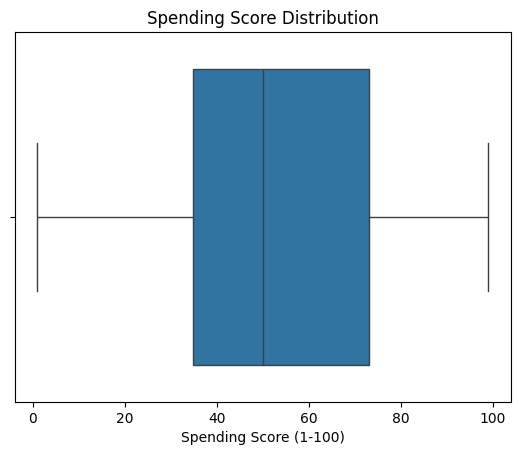

In [56]:
sns.boxplot(x=df['Spending Score (1-100)'])
plt.title('Spending Score Distribution')
plt.show()

In [57]:
df[df['Spending Score (1-100)'] < Lower_Bound['Spending Score (1-100)']]

,CustomerID,Gender,Customer_Age,Customer_Annual_Income,Spending Score (1-100)


In [58]:
df[df['Spending Score (1-100)'] > Upper_Bound['Spending Score (1-100)']]

,CustomerID,Gender,Customer_Age,Customer_Annual_Income,Spending Score (1-100)


In [59]:
df.loc[df['Spending Score (1-100)'] > Upper_Bound['Spending Score (1-100)'], 'Spending Score (1-100)'] = Upper_Bound['Spending Score (1-100)']


In [60]:
df[df['Customer_Annual_Income'] > Upper_Bound['Customer_Annual_Income']]

,CustomerID,Gender,Customer_Age,Customer_Annual_Income,Spending Score (1-100)


In [61]:
print(Upper_Bound)

Customer_Age              200.0
Customer_Annual_Income    133.0
Spending Score (1-100)    100.0
dtype: float64


In [53]:
print(Lower_Bound.astype)

<bound method NDFrame.astype of Customer_Age              10.000
Customer_Annual_Income     0.001
Spending Score (1-100)     1.000
dtype: float64>


# EDA After Cleansing

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Customer_Age            200 non-null    int64  
 3   Customer_Annual_Income  200 non-null    float64
 4   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


In [64]:
df[['Customer_Age','Spending Score (1-100)', 'Customer_Annual_Income']].describe(include='number')


,Customer_Age,Spending Score (1-100),Customer_Annual_Income
count,200.000000,200.000000,200.000000
mean,38.850000,50.200000,60.517500
std,13.969007,25.823522,26.143551
min,18.000000,1.000000,15.000000
25%,28.750000,34.750000,41.500000
50%,36.000000,50.000000,61.500000
75%,49.000000,73.000000,78.000000
max,70.000000,99.000000,132.750000


## Univariant Analysis

### Gender

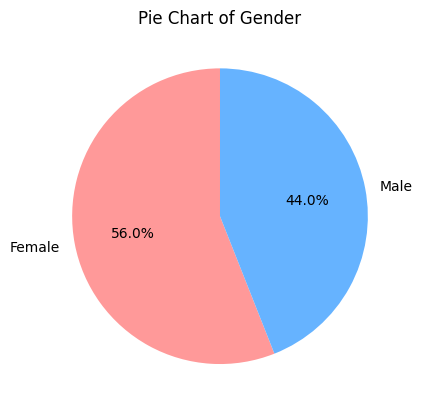

In [ ]:
colors = ['#ff9999','#66b3ff','#ffcc99','#c2c2f0','#99ff99']  # Customize as needed

df['Gender'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=colors,  #  Custom color list
    startangle=90   # Optional: starts pie from 12 o'clock
)

plt.title('Pie Chart of Gender')
plt.ylabel('')  # Hide y-axis label
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

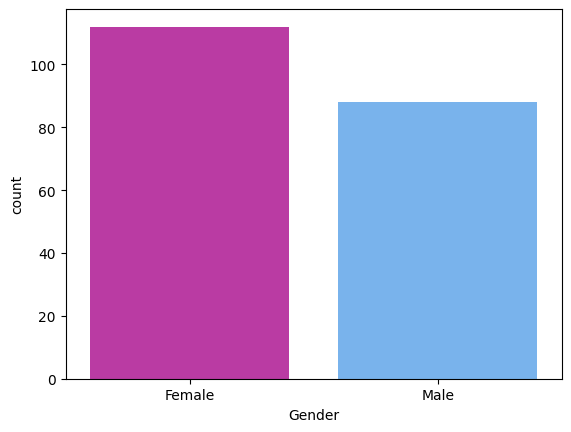

In [91]:
colors = ["#cf26b0",'#66b3ff','#99ff99','#ffcc99','#c2c2f0']  # Customize as needed


sns.barplot(x='Gender', y='count', data=df['Gender'].value_counts().reset_index(), palette=colors)

### Customer_Age

In [92]:
df.columns

Index(['CustomerID', 'Gender', 'Customer_Age', 'Customer_Annual_Income',
       'Spending Score (1-100)'],
      dtype='object')

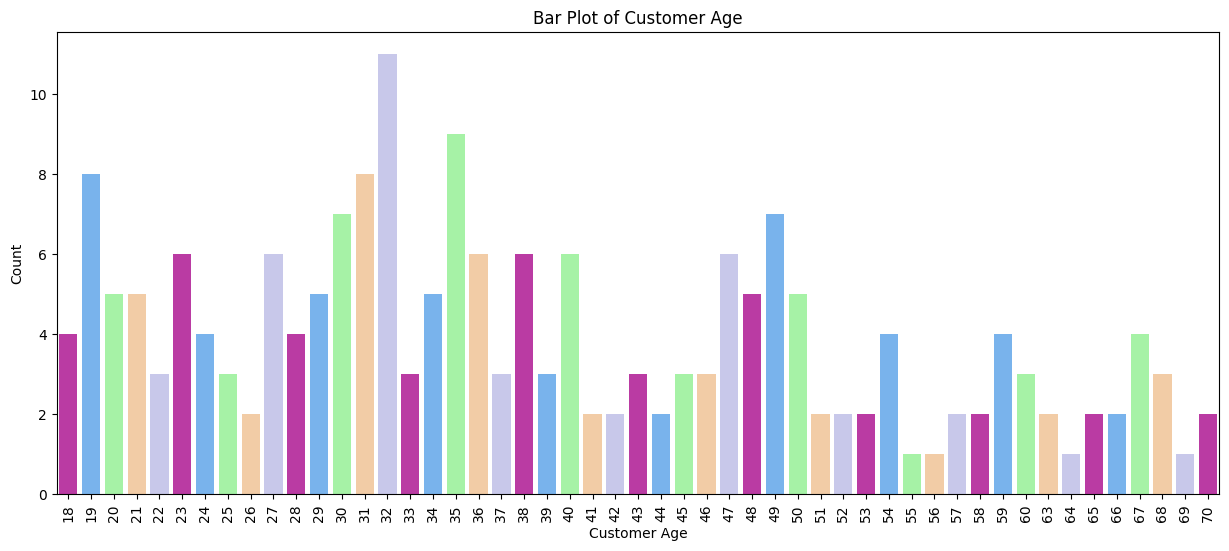

In [97]:
plt.figure(figsize=(15, 6))
sns.barplot(x='Customer_Age', y='count', data=df['Customer_Age'].value_counts().reset_index(), palette=colors)
plt.xticks(rotation=90)
plt.title('Bar Plot of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Count')
plt.show()